In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [2]:
save_plots = True
base_folder = "08-07_09:52"

In [3]:
default_size = 20

plt.rc('font', size=default_size)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=default_size)    # legend fontsize
plt.rc('figure', titlesize=24)  # fontsize of the figure title

In [4]:
file = '/'.join([base_folder, "run_stats.csv"])
df = pd.read_csv(file)

In [5]:
def plot_shaded(title, x_lbl, y_lbl, x, lower, mid, upper, c, shade_lbl, plt_lbl, save_plots, save_name):
    plt.figure(figsize=(30,15))
    plt.title(title)
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    if lower is not None and upper is not None:
        plt.fill_between(x_axis, lower, upper, alpha=.3, color=c, label=shade_lbl)
    plt.ylim(bottom=0, top=70)
    plt.plot(x_axis, mid, color=c, label=plt_lbl)
    plt.legend(loc='lower right')
    if save_plots:
        plt.savefig('/'.join([base_folder, save_name]))

In [6]:
mean = df["30 step mean reward"]
low = (mean - df['std']).clip(0.0, 65.0)
high = (mean + df['std']).clip(0.0, 65.0)
x_axis = df["Episode"]

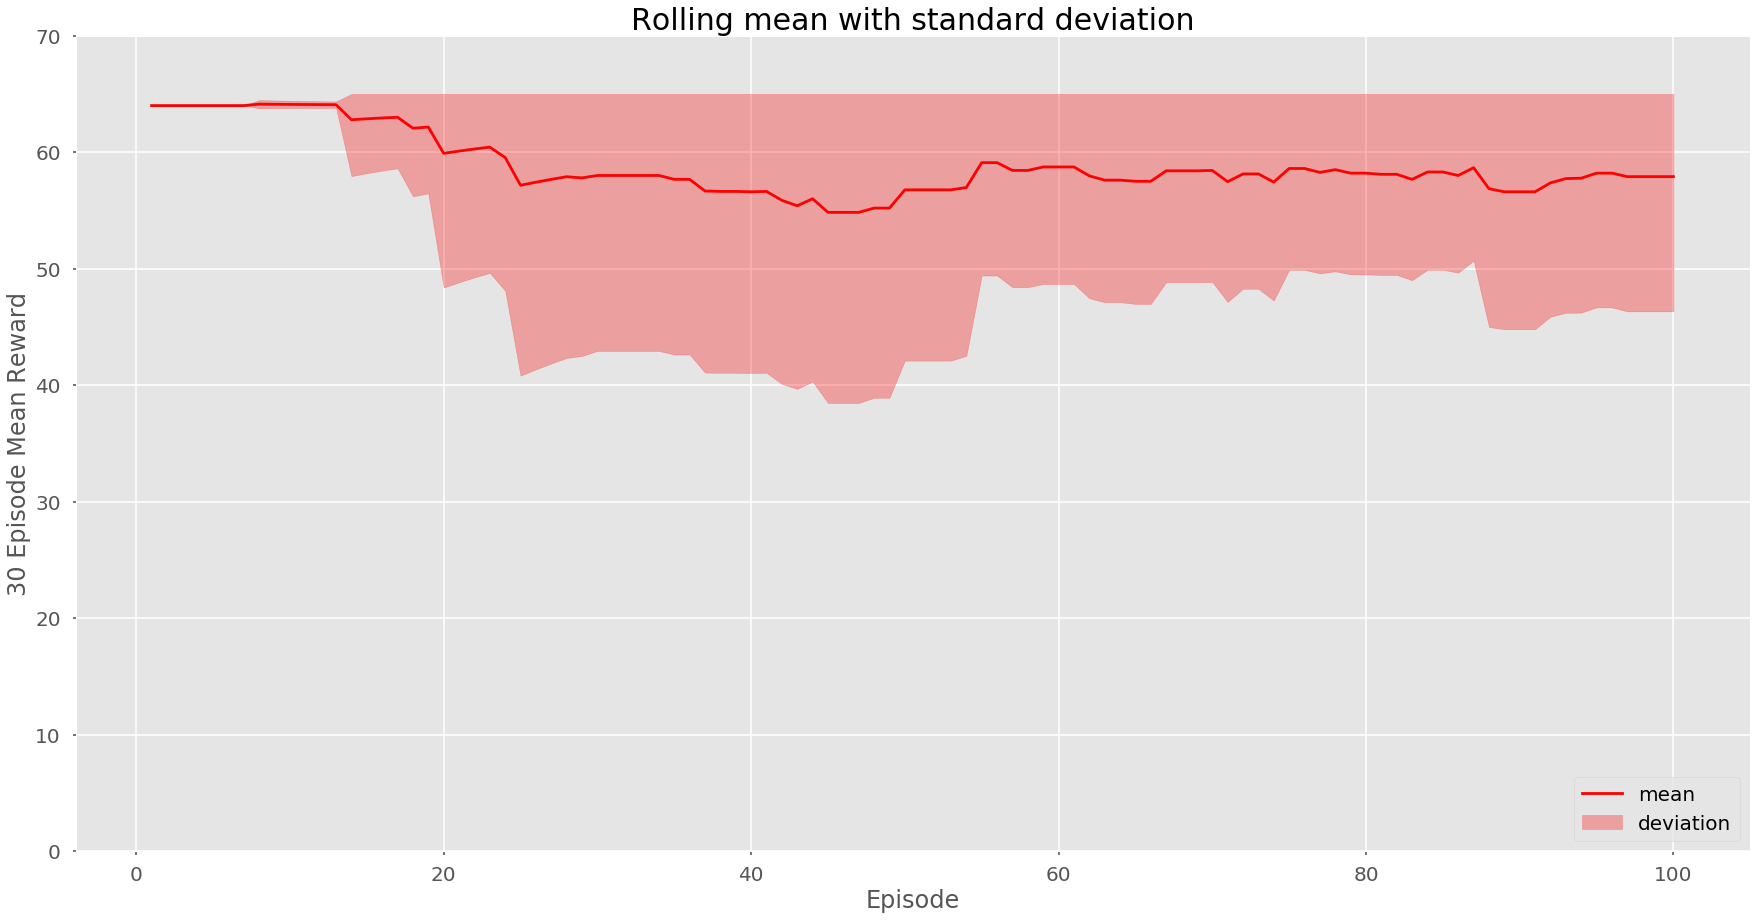

In [7]:
plot_shaded(
    title="Rolling mean with standard deviation", 
    x_lbl="Episode", 
    y_lbl="30 Episode Mean Reward", 
    x=x_axis, 
    lower=low,
    mid=mean, 
    upper=high, 
    c='r', 
    shade_lbl="deviation",
    plt_lbl="mean",
    save_plots=save_plots,
    save_name="mean_plot_30_ep.png"
)

In [8]:
median = df["50%"]
low_quartile = df["25%"]
high_quartile = df["75%"]

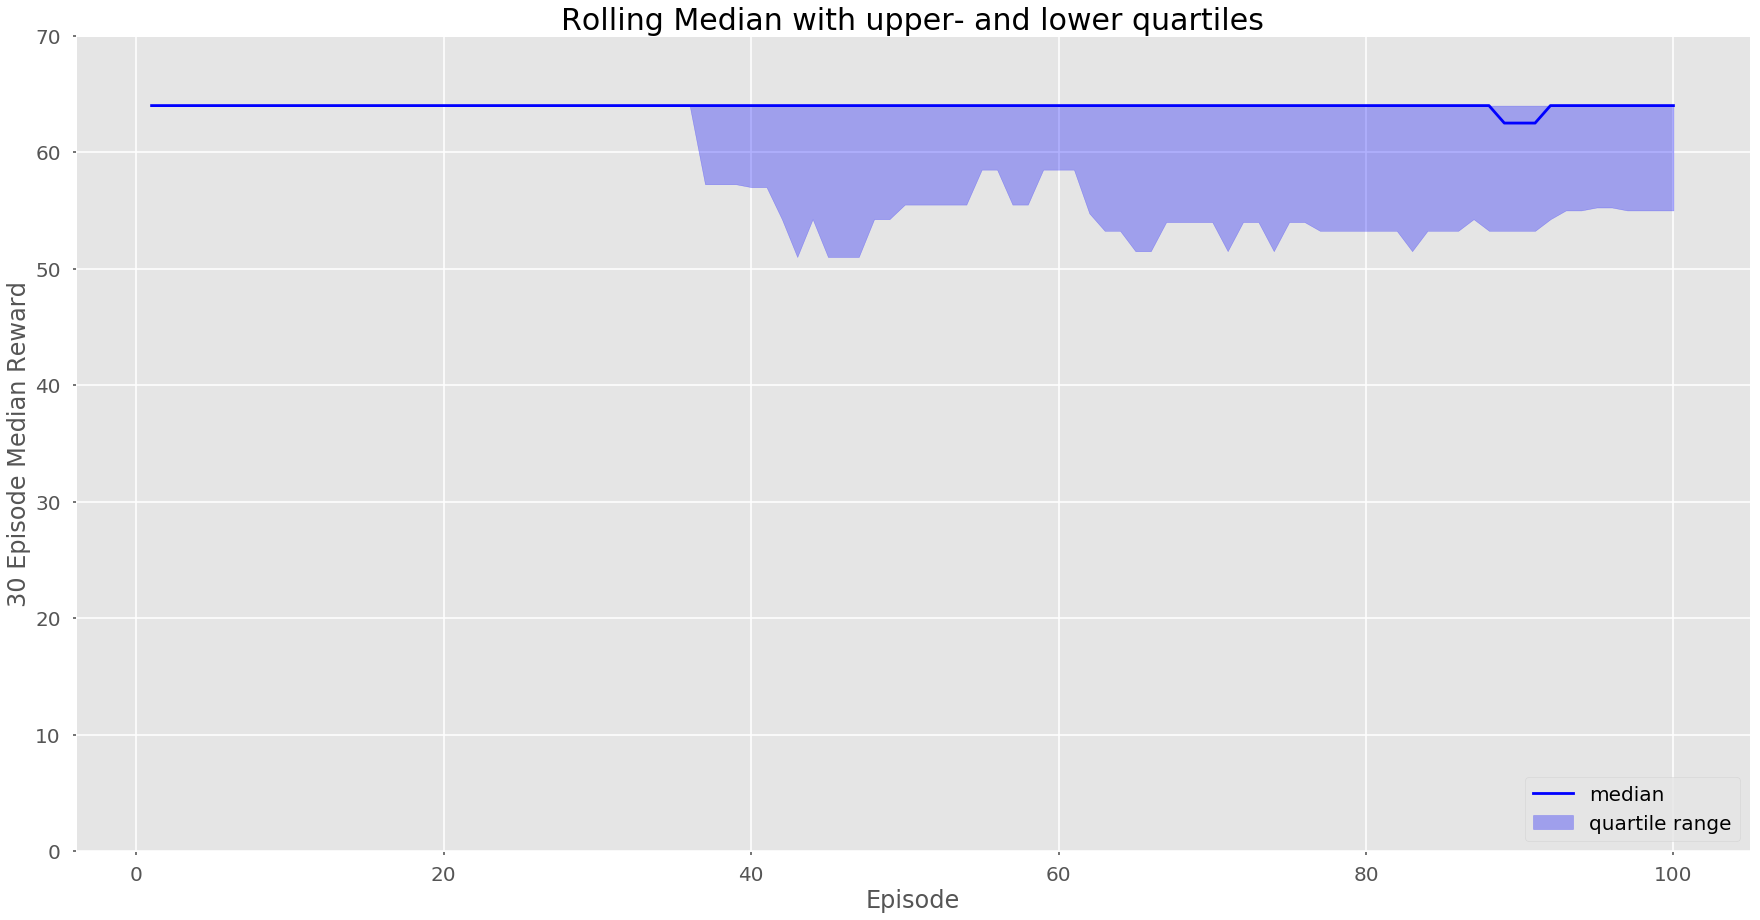

In [9]:
plot_shaded(
    title="Rolling Median with upper- and lower quartiles", 
    x_lbl="Episode", 
    y_lbl="30 Episode Median Reward", 
    x=x_axis, 
    lower=low_quartile,
    mid=median, 
    upper=high_quartile, 
    c='b', 
    shade_lbl="quartile range",
    plt_lbl="median",
    save_plots=save_plots,
    save_name="median_plot_30_ep.png"
)

In [10]:
rewards = df["Reward"]

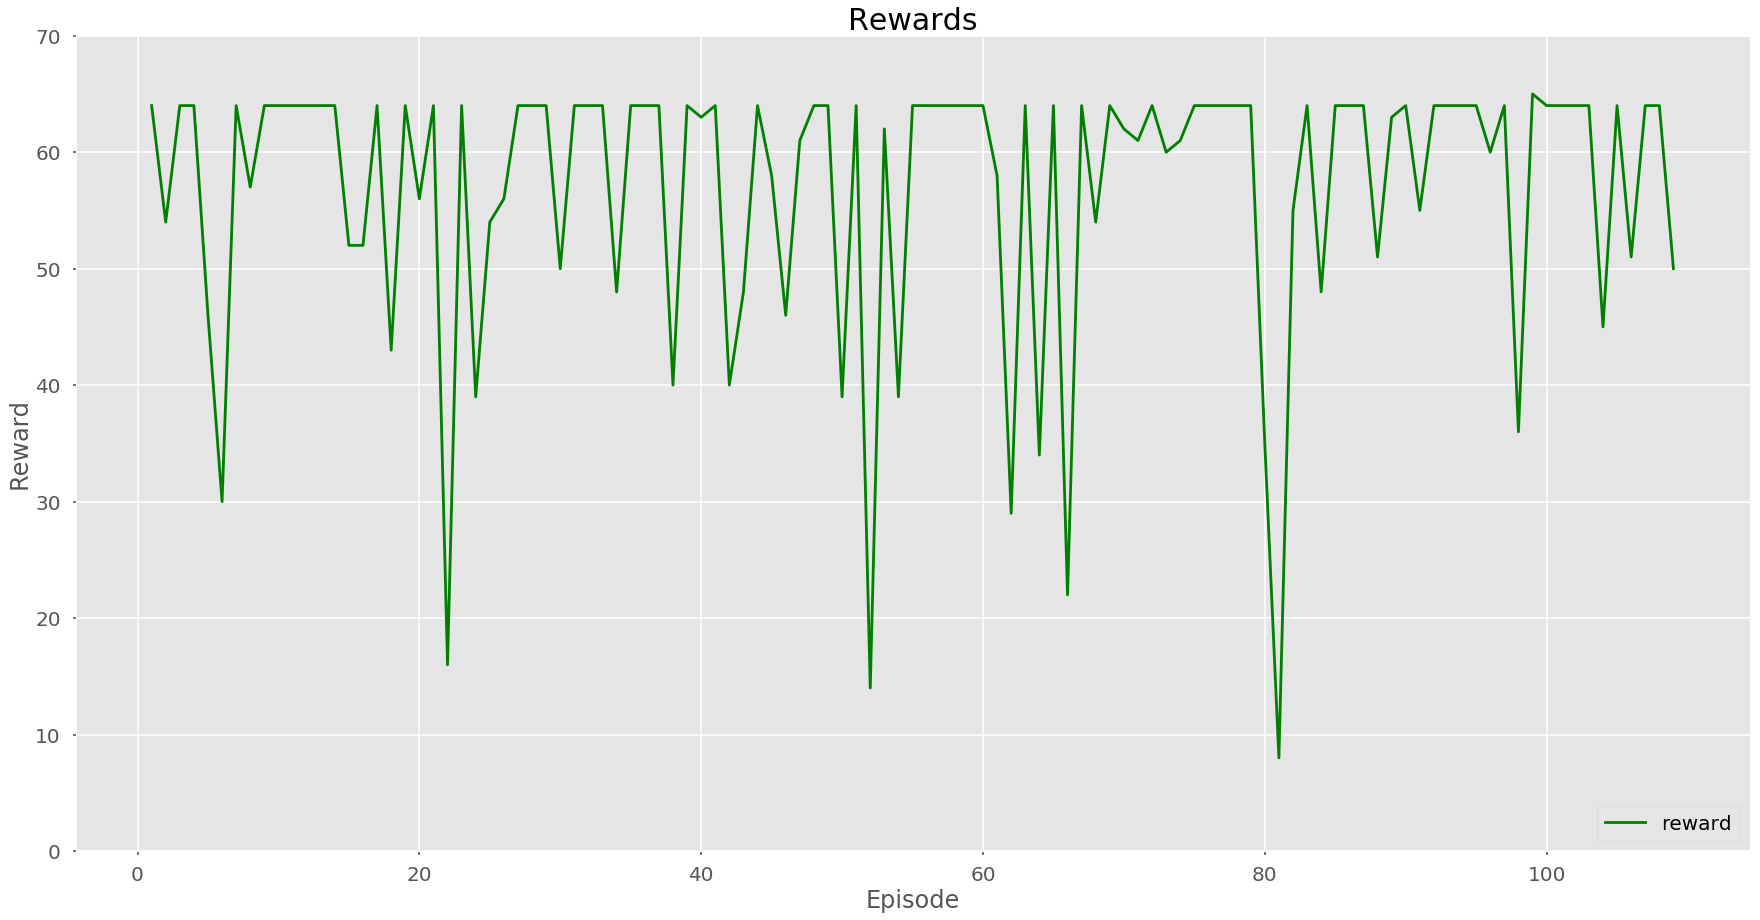

In [11]:
plot_shaded(
    title="Rewards", 
    x_lbl="Episode", 
    y_lbl="Reward", 
    x=x_axis, 
    lower=None,
    mid=rewards, 
    upper=None, 
    c='g', 
    shade_lbl=None,
    plt_lbl="reward",
    save_plots=save_plots,
    save_name="rewards.png"
)